#### 1.  Packages

In [1]:
import pandas as pd
import numpy as np
from numpy import genfromtxt

import joblib
import os
import pathlib
import json
import sys

# If you're working in Jupyter Notebook, include the following so that plots will display:
%matplotlib inline

In [125]:
#common training code
#to import common file
sys.path.insert(1, 'common')
import score_common as score

# when any outside python is updated, run the following to reload the new version
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### 2.  Variables

In [20]:
data_path = 'ignore/data/'
image_path = "ignore\\images\\"
model_path = 'ignore/model/'

TAACF = 'TAACF'
MLSMR = 'MLSMR'
WRF = 'WRF'
CRF = 'CRF'
RFU = 'RFU'
F1 = 'F1'

suffix_MLSMR = '_M'
suffix_TAACF = '_TS'
title_index = 'Dataset — Model'
dir_AUC = 'AUC'
dir_PR = 'PrecisionRecall'

filename_model_metrics = 'model_metrics'

datasets = [TAACF, MLSMR]
models = {TAACF: [WRF, CRF], MLSMR: [WRF, RFU]}
metrics = {TAACF: [f'{WRF} {F1}', f'{CRF} {F1}'], MLSMR: [f'{WRF} {F1}', f'{RFU} {F1}']}
datasets_scored = {TAACF: [TAACF, MLSMR], MLSMR: [MLSMR, TAACF]}
datasets_scored_suffix = {TAACF: [suffix_TAACF, suffix_MLSMR], MLSMR: [suffix_MLSMR, suffix_TAACF]}

#### 3. Load all scores

In [4]:
scores = score.get_model_performance(data_path, filename_model_metrics, datasets, models, metrics, datasets_scored, datasets_scored_suffix, title_index)

#### 4.&nbsp;&nbsp; Merge Cross Dataset Scoring

In [8]:
# combine cross dataset  TAACF & MLSMR scoring of each other
dfScores_CrossDataset = pd.concat([scores[1], scores[3]], axis=0)
dfScores_CrossDataset.sort_values('Group', inplace=True, ascending=False)
dfScores_CrossDataset

Dataset — Model,Group,Balanced Acc,Specificity,Sensitivity,Precision,Recall,F1,MCC,Youden,Kappa,AUC,AUC TH,PR AUC,PR TH,TP,FN,TN,FP
MLSMR — TAACF WRF,TAACF Weighted,0.556557,0.989854,0.123259,0.182792,0.123259,0.147235,0.137336,0.113114,0.134634,0.771594,0.500000,0.105865,0.500000,478,3400,208491,2137
MLSMR — TAACF WRF ROC Th,TAACF Weighted,0.699927,0.675770,0.724085,0.039494,0.724085,0.074902,0.113174,0.399854,0.042057,0.771594,0.190043,0.105865,NaN,2808,1070,142336,68292
MLSMR — TAACF WRF PR Th,TAACF Weighted,0.595905,0.970047,0.221764,0.119961,0.221764,0.155698,0.142189,0.191811,0.135411,0.771594,NaN,0.105865,0.405736,860,3018,204319,6309
MLSMR — TAACF CRF,TAACF Classic,0.503992,0.999991,0.007994,0.939394,0.007994,0.015853,0.085774,0.007984,0.015552,0.764406,0.500000,0.088871,0.500000,31,3847,210626,2
MLSMR — TAACF CRF ROC Th,TAACF Classic,0.697117,0.681495,0.712739,0.039571,0.712739,0.074978,0.112089,0.394234,0.042167,0.764406,0.021321,0.088871,NaN,2764,1114,143542,67086
MLSMR — TAACF CRF PR Th,TAACF Classic,0.580942,0.971580,0.190304,0.109756,0.190304,0.139219,0.123780,0.161885,0.119016,0.764406,NaN,0.088871,0.081451,738,3140,204642,5986
TAACF — MLSMR WRF,MLSMR Weighted,0.597598,0.992600,0.202595,0.404651,0.202595,0.270007,0.274170,0.195195,0.258014,0.810960,0.500000,0.203552,0.500000,609,2397,120192,896
TAACF — MLSMR WRF ROC Th,MLSMR Weighted,0.727580,0.728280,0.726880,0.062274,0.726880,0.114719,0.155390,0.455160,0.073369,0.810960,0.214830,0.203552,NaN,2185,821,88186,32902
TAACF — MLSMR WRF PR Th,MLSMR Weighted,0.621355,0.986555,0.256154,0.321101,0.256154,0.284974,0.271062,0.242710,0.269265,0.810960,NaN,0.203552,0.452432,770,2236,119460,1628
TAACF — MLSMR RFU,MLSMR Undersampling,0.645674,0.970988,0.320359,0.215147,0.320359,0.257418,0.240222,0.291347,0.235253,0.804719,0.500000,0.204230,0.500000,963,2043,117575,3513


In [87]:
dfScores_CrossDataset

Dataset — Model,Group,Classifier,Balanced Acc,Specificity,Sensitivity,Precision,Recall,F1,MCC,Youden,Kappa,AUC,AUC TH,PR AUC,PR TH,TP,FN,TN,FP
MLSMR — TAACF WRF,TAACF Weighted,MLSMR — TAACF WRF,0.556557,0.989854,0.123259,0.182792,0.123259,0.147235,0.137336,0.113114,0.134634,0.771594,0.500000,0.105865,0.500000,478,3400,208491,2137
MLSMR — TAACF WRF ROC Th,TAACF Weighted,MLSMR — TAACF WRF ROC Th,0.699927,0.675770,0.724085,0.039494,0.724085,0.074902,0.113174,0.399854,0.042057,0.771594,0.190043,0.105865,NaN,2808,1070,142336,68292
MLSMR — TAACF WRF PR Th,TAACF Weighted,MLSMR — TAACF WRF PR Th,0.595905,0.970047,0.221764,0.119961,0.221764,0.155698,0.142189,0.191811,0.135411,0.771594,NaN,0.105865,0.405736,860,3018,204319,6309
MLSMR — TAACF CRF,TAACF Classic,MLSMR — TAACF CRF,0.503992,0.999991,0.007994,0.939394,0.007994,0.015853,0.085774,0.007984,0.015552,0.764406,0.500000,0.088871,0.500000,31,3847,210626,2
MLSMR — TAACF CRF ROC Th,TAACF Classic,MLSMR — TAACF CRF ROC Th,0.697117,0.681495,0.712739,0.039571,0.712739,0.074978,0.112089,0.394234,0.042167,0.764406,0.021321,0.088871,NaN,2764,1114,143542,67086
MLSMR — TAACF CRF PR Th,TAACF Classic,MLSMR — TAACF CRF PR Th,0.580942,0.971580,0.190304,0.109756,0.190304,0.139219,0.123780,0.161885,0.119016,0.764406,NaN,0.088871,0.081451,738,3140,204642,5986
TAACF — MLSMR WRF,MLSMR Weighted,TAACF — MLSMR WRF,0.597598,0.992600,0.202595,0.404651,0.202595,0.270007,0.274170,0.195195,0.258014,0.810960,0.500000,0.203552,0.500000,609,2397,120192,896
TAACF — MLSMR WRF ROC Th,MLSMR Weighted,TAACF — MLSMR WRF ROC Th,0.727580,0.728280,0.726880,0.062274,0.726880,0.114719,0.155390,0.455160,0.073369,0.810960,0.214830,0.203552,NaN,2185,821,88186,32902
TAACF — MLSMR WRF PR Th,MLSMR Weighted,TAACF — MLSMR WRF PR Th,0.621355,0.986555,0.256154,0.321101,0.256154,0.284974,0.271062,0.242710,0.269265,0.810960,NaN,0.203552,0.452432,770,2236,119460,1628
TAACF — MLSMR RFU,MLSMR Undersampling,TAACF — MLSMR RFU,0.645674,0.970988,0.320359,0.215147,0.320359,0.257418,0.240222,0.291347,0.235253,0.804719,0.500000,0.204230,0.500000,963,2043,117575,3513


#### 5.&nbsp;&nbsp; Merge all scoring performed by TAACF models

In [14]:
dfScores_TAACF = pd.concat([scores[0], scores[1]], axis=0)
dfScores_TAACF.sort_values('Group', inplace=True, ascending=False)
dfScores_TAACF

Dataset — Model,Group,Balanced Acc,Specificity,Sensitivity,Precision,Recall,F1,MCC,Youden,Kappa,AUC,AUC TH,PR AUC,PR TH,TP,FN,TN,FP
TAACF — TAACF WRF,TAACF Weighted,0.683432,0.980841,0.386023,0.333333,0.386023,0.357749,0.341579,0.366864,0.340612,0.890776,0.500000,0.302109,0.500000,232,369,23754,464
TAACF — TAACF WRF ROC Th,TAACF Weighted,0.813483,0.829961,0.797005,0.104198,0.797005,0.184302,0.248085,0.626966,0.147801,0.890776,0.253313,0.302109,NaN,479,122,20100,4118
TAACF — TAACF WRF PR Th,TAACF Weighted,0.658319,0.988851,0.327787,0.421842,0.327787,0.368914,0.358215,0.316638,0.355260,0.890776,NaN,0.302109,0.590708,197,404,23948,270
MLSMR — TAACF WRF,TAACF Weighted,0.556557,0.989854,0.123259,0.182792,0.123259,0.147235,0.137336,0.113114,0.134634,0.771594,0.500000,0.105865,0.500000,478,3400,208491,2137
MLSMR — TAACF WRF ROC Th,TAACF Weighted,0.699927,0.675770,0.724085,0.039494,0.724085,0.074902,0.113174,0.399854,0.042057,0.771594,0.190043,0.105865,NaN,2808,1070,142336,68292
MLSMR — TAACF WRF PR Th,TAACF Weighted,0.595905,0.970047,0.221764,0.119961,0.221764,0.155698,0.142189,0.191811,0.135411,0.771594,NaN,0.105865,0.405736,860,3018,204319,6309
TAACF — TAACF CRF,TAACF Classic,0.530225,0.998885,0.061564,0.578125,0.061564,0.111278,0.183221,0.060449,0.107116,0.880015,0.500000,0.262794,0.500000,37,564,24191,27
TAACF — TAACF CRF ROC Th,TAACF Classic,0.801572,0.839417,0.763727,0.105566,0.763727,0.185492,0.243901,0.603144,0.149295,0.880015,0.033804,0.262794,NaN,459,142,20329,3889
TAACF — TAACF CRF PR Th,TAACF Classic,0.653092,0.985052,0.321131,0.347748,0.321131,0.333910,0.318318,0.306184,0.318054,0.880015,NaN,0.262794,0.126216,193,408,23856,362
MLSMR — TAACF CRF,TAACF Classic,0.503992,0.999991,0.007994,0.939394,0.007994,0.015853,0.085774,0.007984,0.015552,0.764406,0.500000,0.088871,0.500000,31,3847,210626,2


#### 6.&nbsp;&nbsp; Merge all scoring performed by MLSMR models

In [17]:
dfScores_MLSMR = pd.concat([scores[2], scores[3]], axis=0)
dfScores_MLSMR.sort_values('Group', inplace=True, ascending=False)
dfScores_MLSMR

Dataset — Model,Group,Balanced Acc,Specificity,Sensitivity,Precision,Recall,F1,MCC,Youden,Kappa,AUC,AUC TH,PR AUC,PR TH,TP,FN,TN,FP
MLSMR — MLSMR WRF,MLSMR Weighted,0.635630,0.991620,0.279639,0.380702,0.279639,0.322437,0.315732,0.271260,0.311895,0.866907,0.500000,0.256290,0.500000,217,559,41773,353
MLSMR — MLSMR WRF ROC Th,MLSMR Weighted,0.786748,0.802877,0.770619,0.067176,0.770619,0.123579,0.188475,0.573496,0.093413,0.866907,0.211918,0.256290,NaN,598,178,33822,8304
MLSMR — MLSMR WRF PR Th,MLSMR Weighted,0.643903,0.990125,0.297680,0.357032,0.297680,0.324666,0.314712,0.287805,0.313373,0.866907,NaN,0.256290,0.483059,231,545,41710,416
TAACF — MLSMR WRF,MLSMR Weighted,0.597598,0.992600,0.202595,0.404651,0.202595,0.270007,0.274170,0.195195,0.258014,0.810960,0.500000,0.203552,0.500000,609,2397,120192,896
TAACF — MLSMR WRF ROC Th,MLSMR Weighted,0.727580,0.728280,0.726880,0.062274,0.726880,0.114719,0.155390,0.455160,0.073369,0.810960,0.214830,0.203552,NaN,2185,821,88186,32902
TAACF — MLSMR WRF PR Th,MLSMR Weighted,0.621355,0.986555,0.256154,0.321101,0.256154,0.284974,0.271062,0.242710,0.269265,0.810960,NaN,0.203552,0.452432,770,2236,119460,1628
MLSMR — MLSMR RFU,MLSMR Undersampling,0.674132,0.974553,0.373711,0.212922,0.373711,0.271282,0.264724,0.348264,0.254092,0.858227,0.500000,0.216483,0.500000,290,486,41054,1072
MLSMR — MLSMR RFU ROC Th,MLSMR Undersampling,0.777880,0.826378,0.729381,0.071827,0.729381,0.130776,0.191275,0.555759,0.101176,0.858227,0.281655,0.216483,NaN,566,210,34812,7314
MLSMR — MLSMR RFU PR Th,MLSMR Undersampling,0.622411,0.990956,0.253866,0.340830,0.253866,0.290990,0.283008,0.244822,0.279869,0.858227,NaN,0.216483,0.606184,197,579,41745,381
TAACF — MLSMR RFU,MLSMR Undersampling,0.645674,0.970988,0.320359,0.215147,0.320359,0.257418,0.240222,0.291347,0.235253,0.804719,0.500000,0.204230,0.500000,963,2043,117575,3513


#### 7.&nbsp;&nbsp; Model Comparisons

##### TAACF Model Scoring

In [19]:
caption = f'{TAACF} and {MLSMR} datasets<br>scored with {TAACF} models'
imgfilename=f"{image_path}{TAACF}_Scoring_{TAACF}&{MLSMR}_Comparison"
score.get_ClassifierScores(dfScores_TAACF, caption, hide=['Group'], top=3, imgfilename=imgfilename)

Classifier,Balanced Acc,Specificity,Sensitivity,Precision,Recall,F1,MCC,Youden,Kappa,AUC,AUC TH,PR AUC,PR TH,TP,FN,TN,FP
MLSMR — TAACF CRF,0.5040,1.0000,0.0080,0.9394,0.0080,0.0159,0.0858,0.0080,0.0156,0.7644,0.5000,0.0889,0.5000,31,3847,210626,2
MLSMR — TAACF CRF PR Th,0.5809,0.9716,0.1903,0.1098,0.1903,0.1392,0.1238,0.1619,0.1190,0.7644,,0.0889,0.0815,738,3140,204642,5986
MLSMR — TAACF CRF ROC Th,0.6971,0.6815,0.7127,0.0396,0.7127,0.0750,0.1121,0.3942,0.0422,0.7644,0.0213,0.0889,,2764,1114,143542,67086
TAACF — TAACF CRF,0.5302,0.9989,0.0616,0.5781,0.0616,0.1113,0.1832,0.0604,0.1071,0.8800,0.5000,0.2628,0.5000,37,564,24191,27
TAACF — TAACF CRF PR Th,0.6531,0.9851,0.3211,0.3477,0.3211,0.3339,0.3183,0.3062,0.3181,0.8800,,0.2628,0.1262,193,408,23856,362
TAACF — TAACF CRF ROC Th,0.8016,0.8394,0.7637,0.1056,0.7637,0.1855,0.2439,0.6031,0.1493,0.8800,0.0338,0.2628,,459,142,20329,3889
MLSMR — TAACF WRF,0.5566,0.9899,0.1233,0.1828,0.1233,0.1472,0.1373,0.1131,0.1346,0.7716,0.5000,0.1059,0.5000,478,3400,208491,2137
MLSMR — TAACF WRF PR Th,0.5959,0.9700,0.2218,0.1200,0.2218,0.1557,0.1422,0.1918,0.1354,0.7716,,0.1059,0.4057,860,3018,204319,6309
MLSMR — TAACF WRF ROC Th,0.6999,0.6758,0.7241,0.0395,0.7241,0.0749,0.1132,0.3999,0.0421,0.7716,0.1900,0.1059,,2808,1070,142336,68292
TAACF — TAACF WRF,0.6834,0.9808,0.3860,0.3333,0.3860,0.3577,0.3416,0.3669,0.3406,0.8908,0.5000,0.3021,0.5000,232,369,23754,464


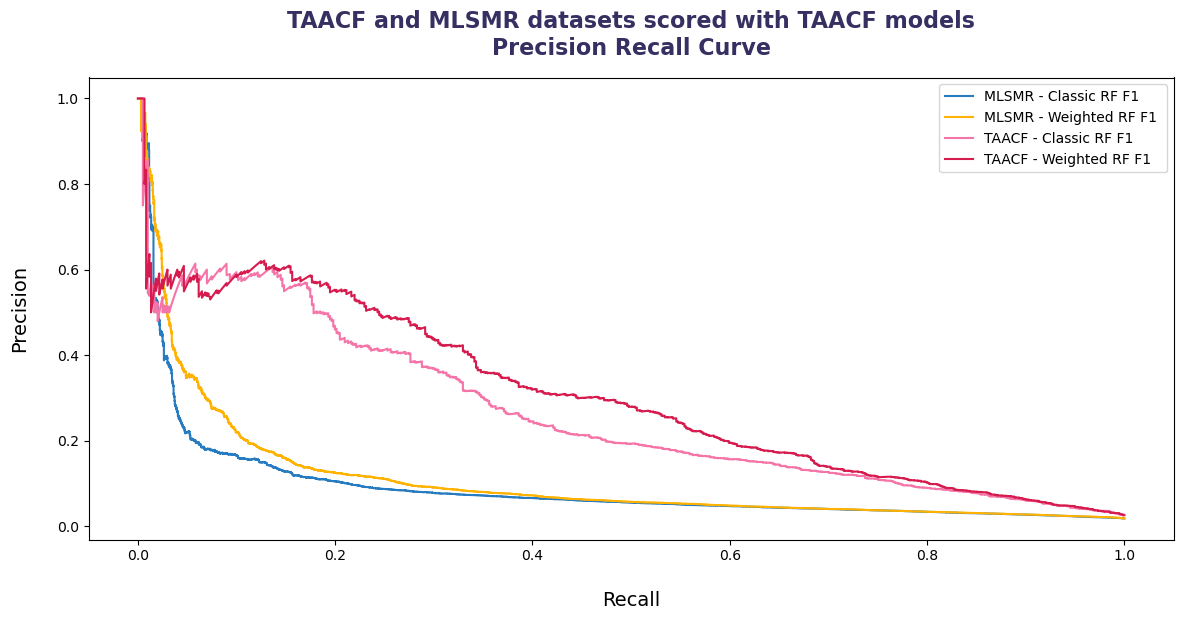

In [80]:
# set the data path
data_dir = dir_PR

path_wrf = f'{data_path}/wrf/{data_dir}/'
path_crf = f'{data_path}/crf/{data_dir}/'

# set the names of the files
classifiers = [
    {path_wrf: [f'wrf_f1{suffix_TAACF}', f'wrf_f1{suffix_TAACF}_scoring{suffix_MLSMR}']},
    {path_crf: [f'crf_f1{suffix_TAACF}', f'crf_f1{suffix_TAACF}_scoring{suffix_MLSMR}']}
]

# set the different dataset results to compare
datasets = {
  'TS_scoring_M': f"{MLSMR} - ",
  suffix_MLSMR: f"{MLSMR} - ",
  suffix_TAACF: f"{TAACF} - "  
}

# set x and y axis
xy = ['Recall', 'Precision']

# get precision recall data and create a new df to append all results to
dfPrecisionRecallOpt = score.get_auc_dataOpt_multidatasets(classifiers, xy, datasets)
dfPrecisionRecallOpt.sort_index(inplace=True)

# compare precision recall data
#imgfilename = f'{image_path_base}TAACF_AUCPR'
title = f'{TAACF} and {MLSMR} datasets scored with {TAACF} models'
subtitle = 'Precision Recall Curve'
score.plot_recall_curve_comparison(dfPrecisionRecallOpt, title=title, subtitle=subtitle)

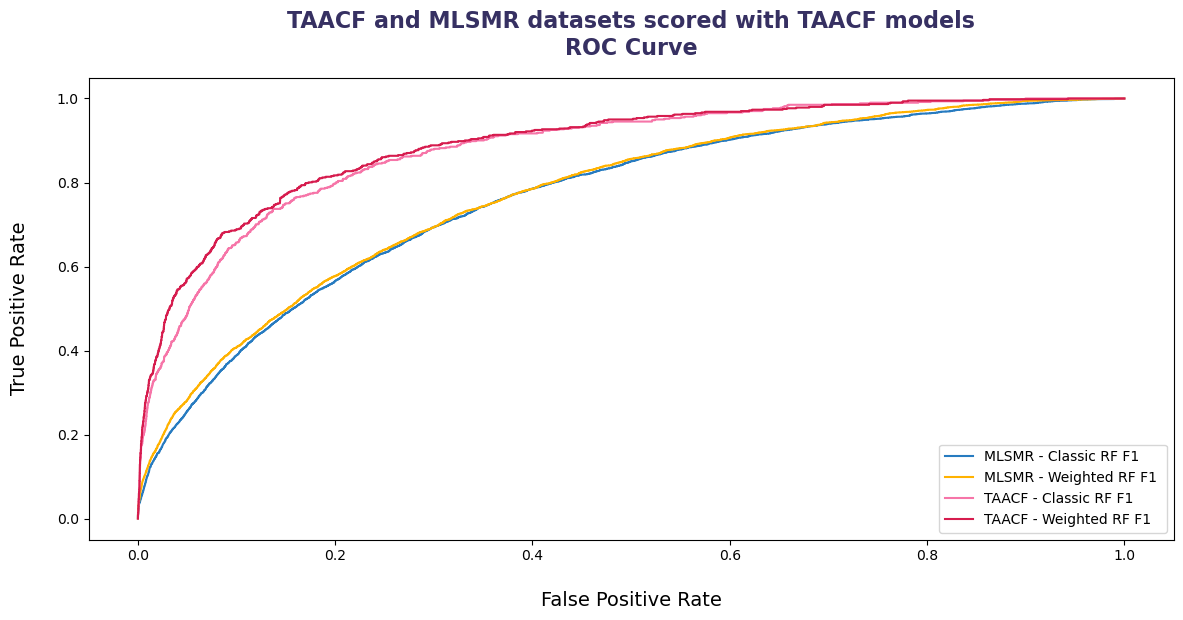

In [83]:
# set the data path
data_dir = dir_AUC

path_wrf = f'{data_path}/wrf/{data_dir}/'
path_crf = f'{data_path}/crf/{data_dir}/'

# set the names of the files
classifiers = [
    {path_wrf: [f'wrf_f1{suffix_TAACF}', f'wrf_f1{suffix_TAACF}_scoring{suffix_MLSMR}']},
    {path_crf: [f'crf_f1{suffix_TAACF}', f'crf_f1{suffix_TAACF}_scoring{suffix_MLSMR}']}
]

# set the different dataset results to compare
datasets = {
  'TS_scoring_M': f"MLSMR - ",
  suffix_MLSMR: f"MLSMR - ",
  suffix_TAACF: f"TAACF - "  
}

# set x and y axis
xy = ['FPR', 'TPR']

# get precision recall data and create a new df to append all results to
dfPrecisionRecallOpt = score.get_auc_dataOpt_multidatasets(classifiers, xy, datasets)
dfPrecisionRecallOpt.sort_index(inplace=True)

# compare precision recall data
imgfilename = f'{image_path}TAACF_AUCPR'
title = f'{TAACF} and {MLSMR} datasets scored with {TAACF} models'
subtitle = 'ROC Curve'
score.plot_auc_curve_comparison(dfPrecisionRecallOpt, title=title, subtitle=subtitle, imgfilename=imgfilename)

##### MLSMR Model Scoring

In [78]:
caption = f'{TAACF} and {MLSMR} datasets<br>scored with {MLSMR} models'
imgfilename=f"{image_path}{MLSMR}_Scoring_{TAACF}&{MLSMR}_Comparison"
score.get_ClassifierScores(dfScores_MLSMR, caption, hide=['Group'], top=3, imgfilename=imgfilename)

Classifier,Balanced Acc,Specificity,Sensitivity,Precision,Recall,F1,MCC,Youden,Kappa,AUC,AUC TH,PR AUC,PR TH,TP,FN,TN,FP
MLSMR — MLSMR RFU,0.6741,0.9746,0.3737,0.2129,0.3737,0.2713,0.2647,0.3483,0.2541,0.8582,0.5000,0.2165,0.5000,290,486,41054,1072
MLSMR — MLSMR RFU PR Th,0.6224,0.9910,0.2539,0.3408,0.2539,0.2910,0.2830,0.2448,0.2799,0.8582,,0.2165,0.6062,197,579,41745,381
MLSMR — MLSMR RFU ROC Th,0.7779,0.8264,0.7294,0.0718,0.7294,0.1308,0.1913,0.5558,0.1012,0.8582,0.2817,0.2165,,566,210,34812,7314
TAACF — MLSMR RFU,0.6457,0.9710,0.3204,0.2151,0.3204,0.2574,0.2402,0.2913,0.2353,0.8047,0.5000,0.2042,0.5000,963,2043,117575,3513
TAACF — MLSMR RFU PR Th,0.6187,0.9879,0.2495,0.3384,0.2495,0.2872,0.2756,0.2374,0.2723,0.8047,,0.2042,0.5742,750,2256,119622,1466
TAACF — MLSMR RFU ROC Th,0.7213,0.7124,0.7302,0.0593,0.7302,0.1097,0.1487,0.4426,0.0679,0.8047,0.2634,0.2042,,2195,811,86265,34823
MLSMR — MLSMR WRF,0.6356,0.9916,0.2796,0.3807,0.2796,0.3224,0.3157,0.2713,0.3119,0.8669,0.5000,0.2563,0.5000,217,559,41773,353
MLSMR — MLSMR WRF PR Th,0.6439,0.9901,0.2977,0.3570,0.2977,0.3247,0.3147,0.2878,0.3134,0.8669,,0.2563,0.4831,231,545,41710,416
MLSMR — MLSMR WRF ROC Th,0.7867,0.8029,0.7706,0.0672,0.7706,0.1236,0.1885,0.5735,0.0934,0.8669,0.2119,0.2563,,598,178,33822,8304
TAACF — MLSMR WRF,0.5976,0.9926,0.2026,0.4047,0.2026,0.2700,0.2742,0.1952,0.2580,0.8110,0.5000,0.2036,0.5000,609,2397,120192,896


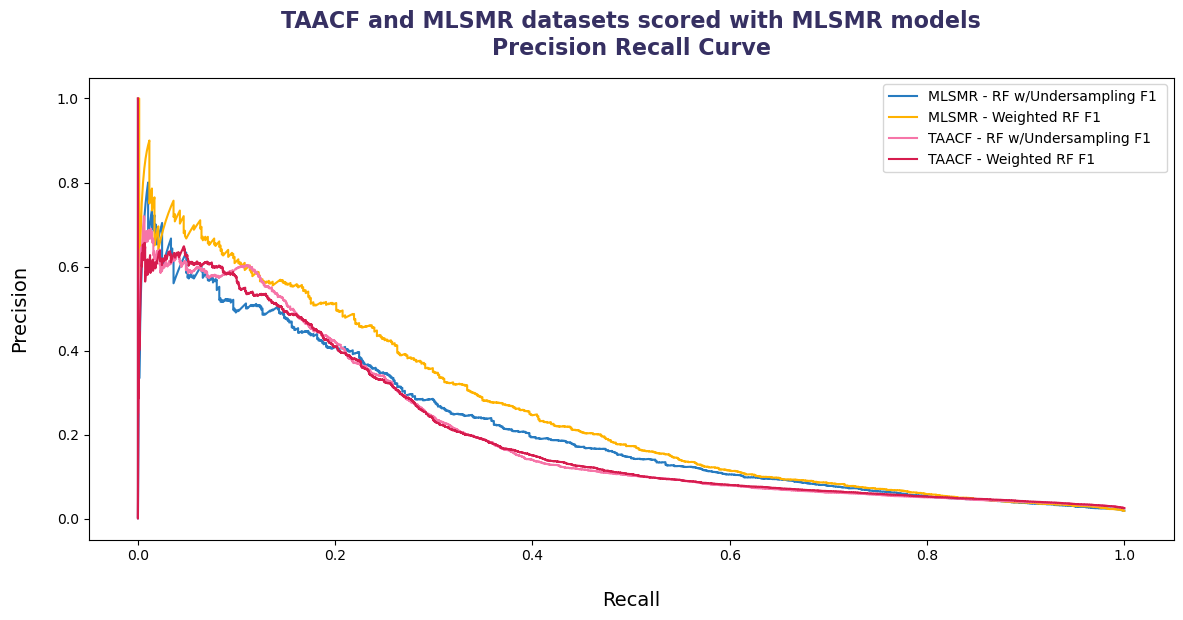

In [82]:
# set the data path
data_dir = dir_PR

path_wrf = f'{data_path}/wrf/{data_dir}/'
path_rfu = f'{data_path}/rfu/{data_dir}/'

# set the names of the files
classifiers = [
    {path_wrf: [f'wrf_f1{suffix_MLSMR}', f'wrf_f1{suffix_MLSMR}_scoring{suffix_TAACF}']},
    {path_rfu: [f'rfu_f1{suffix_MLSMR}', f'rfu_f1{suffix_MLSMR}_scoring{suffix_TAACF}']}
]

# set the different dataset results to compare
datasets = {
  'M_scoring_TS': f"{TAACF} - ",
  suffix_MLSMR: f"{MLSMR} - ",
  suffix_TAACF: f"{TAACF} - "  
}

# set x and y axis
xy = ['Recall', 'Precision']

# get precision recall data and create a new df to append all results to
dfPrecisionRecallOpt = score.get_auc_dataOpt_multidatasets(classifiers, xy, datasets)
dfPrecisionRecallOpt.sort_index(inplace=True)

# compare precision recall data
#imgfilename = f'{image_path_base}TAACF_AUCPR'
title = f'{TAACF} and {MLSMR} datasets scored with {MLSMR} models'
subtitle = 'Precision Recall Curve'
score.plot_recall_curve_comparison(dfPrecisionRecallOpt, title=title, subtitle=subtitle)

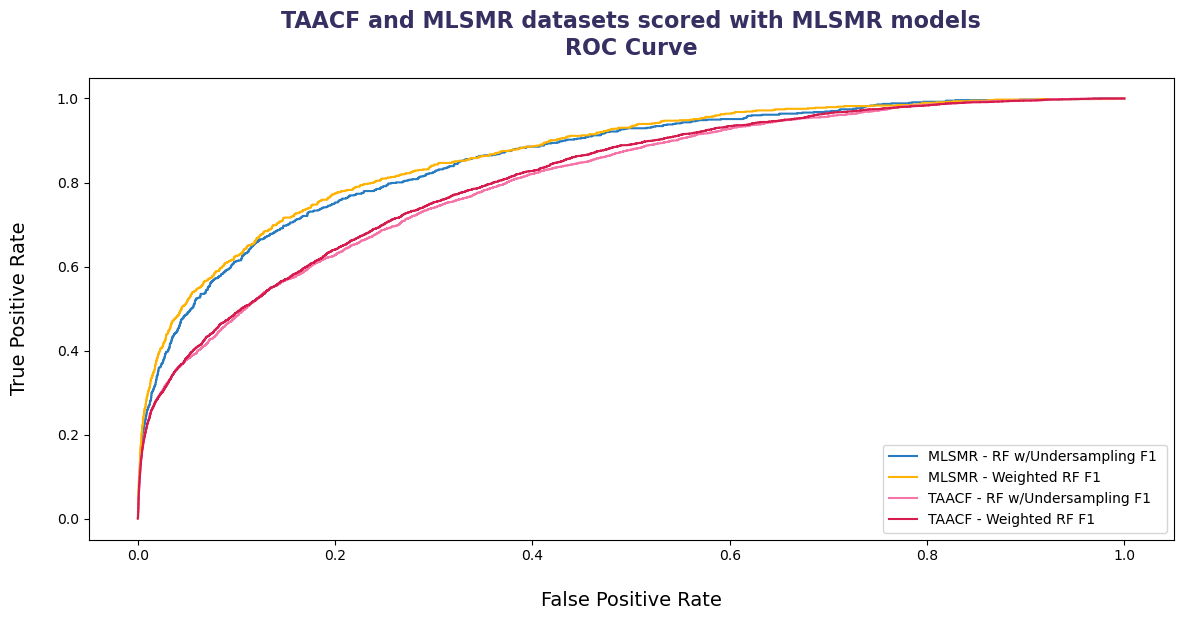

In [85]:
# set the data path
data_dir = dir_AUC

path_wrf = f'{data_path}/wrf/{data_dir}/'
path_rfu = f'{data_path}/rfu/{data_dir}/'

# set the names of the files
classifiers = [
    {path_wrf: [f'wrf_f1{suffix_MLSMR}', f'wrf_f1{suffix_MLSMR}_scoring{suffix_TAACF}']},
    {path_rfu: [f'rfu_f1{suffix_MLSMR}', f'rfu_f1{suffix_MLSMR}_scoring{suffix_TAACF}']}
]

# set the different dataset results to compare
datasets = {
  'M_scoring_TS': f"{TAACF} - ",
  suffix_MLSMR: f"{MLSMR} - ",
  suffix_TAACF: f"{TAACF} - "  
}

# set x and y axis
xy = ['FPR', 'TPR']

# get precision recall data and create a new df to append all results to
dfPrecisionRecallOpt = score.get_auc_dataOpt_multidatasets(classifiers, xy, datasets)
dfPrecisionRecallOpt.sort_index(inplace=True)

# compare precision recall data
imgfilename = f'{image_path}TAACF_AUCPR'
title = f'{TAACF} and {MLSMR} datasets scored with {MLSMR} models'
subtitle = 'ROC Curve'
score.plot_auc_curve_comparison(dfPrecisionRecallOpt, title=title, subtitle=subtitle, imgfilename=imgfilename)

#### MLSMR & TAACF Model Scoring Comparison

In [127]:
caption = f'{MLSMR} scored with {TAACF}<br>and {TAACF} scored with {MLSMR}'
imgfilename=f"{image_path}MLSMRTAACF_ScoringEachOther_Comparison"
score.get_ClassifierScores(dfScores_CrossDataset, caption, hide=['Group'], top=3)

Classifier,Balanced Acc,Specificity,Sensitivity,Precision,Recall,F1,MCC,Youden,Kappa,AUC,AUC TH,PR AUC,PR TH,TP,FN,TN,FP
TAACF — MLSMR RFU,0.6457,0.9710,0.3204,0.2151,0.3204,0.2574,0.2402,0.2913,0.2353,0.8047,0.5000,0.2042,0.5000,963,2043,117575,3513
TAACF — MLSMR RFU PR Th,0.6187,0.9879,0.2495,0.3384,0.2495,0.2872,0.2756,0.2374,0.2723,0.8047,,0.2042,0.5742,750,2256,119622,1466
TAACF — MLSMR RFU ROC Th,0.7213,0.7124,0.7302,0.0593,0.7302,0.1097,0.1487,0.4426,0.0679,0.8047,0.2634,0.2042,,2195,811,86265,34823
TAACF — MLSMR WRF,0.5976,0.9926,0.2026,0.4047,0.2026,0.2700,0.2742,0.1952,0.2580,0.8110,0.5000,0.2036,0.5000,609,2397,120192,896
TAACF — MLSMR WRF PR Th,0.6214,0.9866,0.2562,0.3211,0.2562,0.2850,0.2711,0.2427,0.2693,0.8110,,0.2036,0.4524,770,2236,119460,1628
TAACF — MLSMR WRF ROC Th,0.7276,0.7283,0.7269,0.0623,0.7269,0.1147,0.1554,0.4552,0.0734,0.8110,0.2148,0.2036,,2185,821,88186,32902
MLSMR — TAACF CRF,0.5040,1.0000,0.0080,0.9394,0.0080,0.0159,0.0858,0.0080,0.0156,0.7644,0.5000,0.0889,0.5000,31,3847,210626,2
MLSMR — TAACF CRF PR Th,0.5809,0.9716,0.1903,0.1098,0.1903,0.1392,0.1238,0.1619,0.1190,0.7644,,0.0889,0.0815,738,3140,204642,5986
MLSMR — TAACF CRF ROC Th,0.6971,0.6815,0.7127,0.0396,0.7127,0.0750,0.1121,0.3942,0.0422,0.7644,0.0213,0.0889,,2764,1114,143542,67086
MLSMR — TAACF WRF,0.5566,0.9899,0.1233,0.1828,0.1233,0.1472,0.1373,0.1131,0.1346,0.7716,0.5000,0.1059,0.5000,478,3400,208491,2137


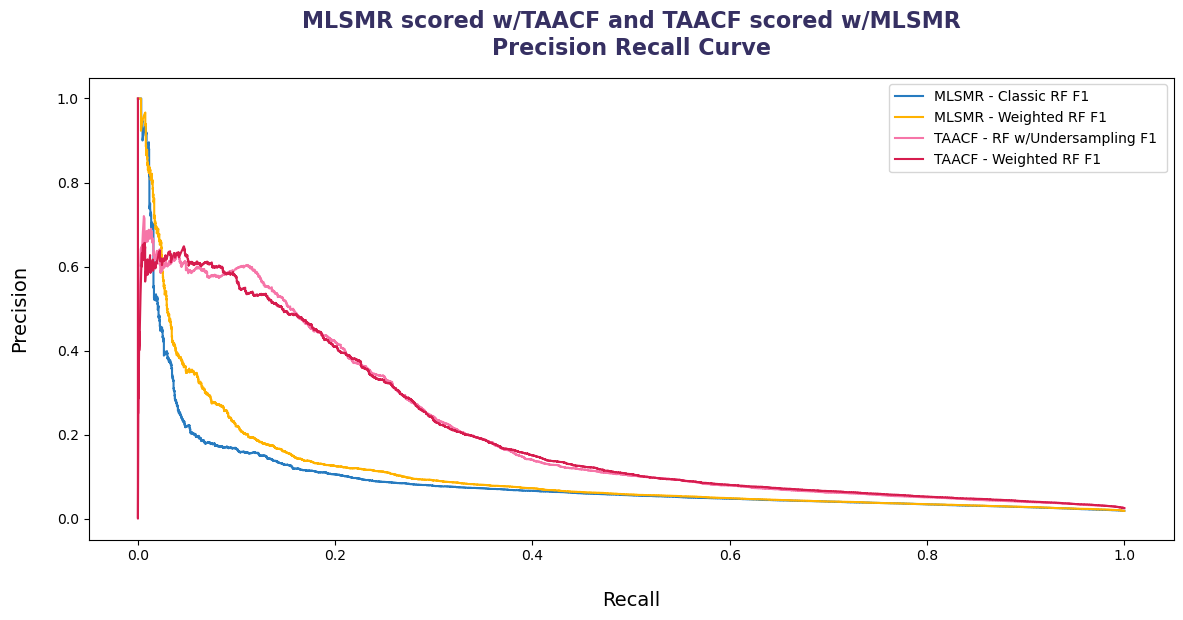

In [131]:
# set the data path
data_dir = dir_PR

path_wrf = f'{data_path}/wrf/{data_dir}/'
path_crf = f'{data_path}/crf/{data_dir}/'
path_rfu = f'{data_path}/rfu/{data_dir}/'

# set the names of the files
classifiers = [
    {path_wrf: [f'wrf_f1{suffix_TAACF}_scoring{suffix_MLSMR}', f'wrf_f1{suffix_MLSMR}_scoring{suffix_TAACF}']},
    {path_rfu: [f'rfu_f1{suffix_MLSMR}_scoring{suffix_TAACF}']},
    {path_crf: [f'crf_f1{suffix_TAACF}_scoring{suffix_MLSMR}']}
]

# set the different dataset results to compare
datasets = {
  'TS_scoring_M': f"{MLSMR} - ",
  'M_scoring_TS': f"{TAACF} - " 
}

# set x and y axis
xy = ['Recall', 'Precision']

# get precision recall data and create a new df to append all results to
dfPrecisionRecallOpt = score.get_auc_dataOpt_multidatasets(classifiers, xy, datasets)
dfPrecisionRecallOpt.sort_index(inplace=True)

# compare precision recall data
imgfilename = f'{image_path}MLSMRTAACF_AUCPR'
title = f'{MLSMR} scored w/{TAACF} and {TAACF} scored w/{MLSMR}'
subtitle = 'Precision Recall Curve'
score.plot_recall_curve_comparison(dfPrecisionRecallOpt, title=title, subtitle=subtitle)

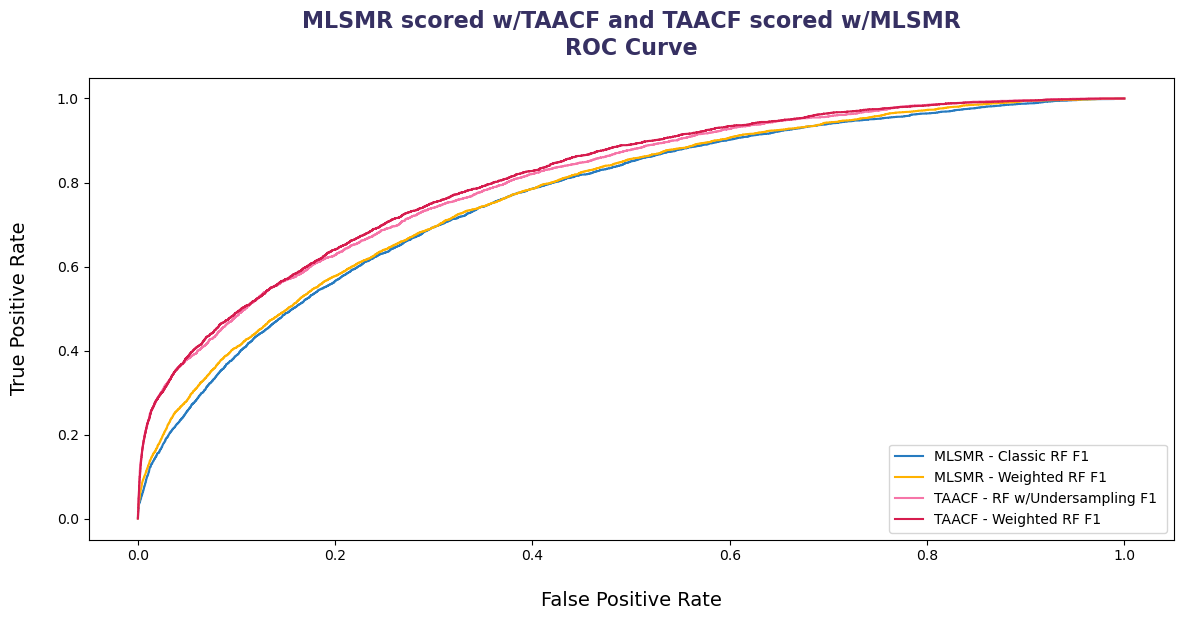

In [134]:
# set the data path
data_dir = dir_AUC

path_wrf = f'{data_path}/wrf/{data_dir}/'
path_crf = f'{data_path}/crf/{data_dir}/'
path_rfu = f'{data_path}/rfu/{data_dir}/'

# set the names of the files
classifiers = [
    {path_wrf: [f'wrf_f1{suffix_TAACF}_scoring{suffix_MLSMR}', f'wrf_f1{suffix_MLSMR}_scoring{suffix_TAACF}']},
    {path_rfu: [f'rfu_f1{suffix_MLSMR}_scoring{suffix_TAACF}']},
    {path_crf: [f'crf_f1{suffix_TAACF}_scoring{suffix_MLSMR}']}
]

# set the different dataset results to compare
datasets = {
  'TS_scoring_M': f"{MLSMR} - ",
  'M_scoring_TS': f"{TAACF} - " 
}

# set x and y axis
xy = ['FPR', 'TPR']

# get precision recall data and create a new df to append all results to
dfPrecisionRecallOpt = score.get_auc_dataOpt_multidatasets(classifiers, xy, datasets)
dfPrecisionRecallOpt.sort_index(inplace=True)

# compare precision recall data
imgfilename = f'{image_path}MLSMRTAACF_AUC'
title = f'{MLSMR} scored w/{TAACF} and {TAACF} scored w/{MLSMR}'
subtitle = 'ROC Curve'
score.plot_auc_curve_comparison(dfPrecisionRecallOpt, title=title, subtitle=subtitle)